In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Завантаження та підготовка даних
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Нормалізація даних
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Перетворення міток в one-hot кодування
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Створення CNN моделі
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
# Transfer Learning з VGG16
def create_transfer_learning_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

    # Заморожування базових шарів
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
# 5. Компіляція та навчання моделей
def train_model(model, x_train, y_train, x_test, y_test):
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x_train,
        y_train,
        batch_size=64,
        epochs=20,
        validation_data=(x_test, y_test),
        steps_per_epoch=len(x_train) // 64
    )

    return history

# Навчання звичайної CNN
cnn_model = create_cnn_model()
cnn_history = train_model(cnn_model, x_train, y_train, x_test, y_test)

# Навчання моделі з Transfer Learning
transfer_model = create_transfer_learning_model()
transfer_history = train_model(transfer_model, x_train, y_train, x_test, y_test)

Epoch 1/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3141 - loss: 1.8845 - val_accuracy: 0.4530 - val_loss: 1.5476
Epoch 2/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 851us/step - accuracy: 0.6250 - loss: 1.0105 - val_accuracy: 0.4521 - val_loss: 1.5367
Epoch 3/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5091 - loss: 1.3696 - val_accuracy: 0.5289 - val_loss: 1.4144
Epoch 4/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.5625 - loss: 1.0919 - val_accuracy: 0.5311 - val_loss: 1.3899
Epoch 5/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5799 - loss: 1.1843 - val_accuracy: 0.5518 - val_loss: 1.2846
Epoch 6/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.6250 - loss: 0.9995 - val_accuracy: 0.5400 - val_loss: 1.3185
Epoch 7/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6271 - loss: 1.0686 - val_accuracy: 0.6322 - val_loss: 1.0703
Epoch 8/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.5000 - loss: 1.1484 - val_accu

In [ ]:
# Оцінка та порівняння результатів
def evaluate_model(model, x_test, y_test):
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Точність на тестовому наборі: {test_accuracy * 100:.2f}%')

print("Результати звичайної CNN:")
evaluate_model(cnn_model, x_test, y_test)

print("\nРезультати моделі з Transfer Learning:")
evaluate_model(transfer_model, x_test, y_test)

Результати звичайної CNN:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7112 - loss: 0.8791
Точність на тестовому наборі: 70.52%

Результати моделі з Transfer Learning:
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6127 - loss: 1.1046
Точність на тестовому наборі: 61.20%


In [ ]:
# Аугментація даних
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(x_train)

In [ ]:
# 5. Компіляція та навчання моделей з аугментацією
def train_model(model, x_train, y_train, x_test, y_test):
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        datagen.flow(x_train, y_train, batch_size=64),
        epochs=20,
        validation_data=(x_test, y_test),
        steps_per_epoch=len(x_train) // 64
    )

    return history

cnn_augmented_history = train_model(cnn_model, x_train, y_train, x_test, y_test)
transfer_augmented_history = train_model(transfer_model, x_train, y_train, x_test, y_test)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.6255 - loss: 1.1209 - val_accuracy: 0.6351 - val_loss: 1.1763
Epoch 2/20
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5625 - loss: 1.1120

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.5625 - loss: 1.1120 - val_accuracy: 0.6471 - val_loss: 1.1040
Epoch 3/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.6434 - loss: 1.0483 - val_accuracy: 0.6787 - val_loss: 0.9482
Epoch 4/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.7188 - loss: 0.8934 - val_accuracy: 0.6623 - val_loss: 1.0001
Epoch 5/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.6542 - loss: 1.0171 - val_accuracy: 0.6865 - val_loss: 0.9300
Epoch 6/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - accuracy: 0.6719 - loss: 0.9805 - val_accuracy: 0.6875 - val_loss: 0.9286
Epoch 7/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.6640 - loss: 0.9944 - val_accuracy: 0.6302 - val_loss: 1.1567
Epoch 8/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.7188 - loss: 0.8944 - val_accuracy: 0.6415 - val_loss: 1.1077
Epoch 9/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.6686 - loss: 0.9764 - val_accurac

In [ ]:
print("Результати CNN після аугментації:")
evaluate_model(cnn_model, x_test, y_test)

print("\nРезультати моделі з Transfer Learning після аугментації:")
evaluate_model(transfer_model, x_test, y_test)

Результати CNN після аугментації:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7389 - loss: 0.7680
Точність на тестовому наборі: 74.18%

Результати моделі з Transfer Learning після аугментації:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6038 - loss: 1.1244
Точність на тестовому наборі: 60.44%


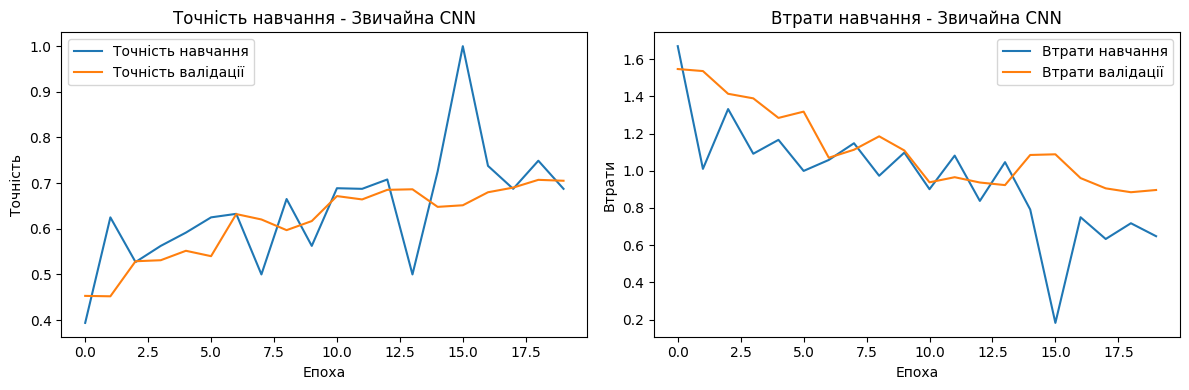

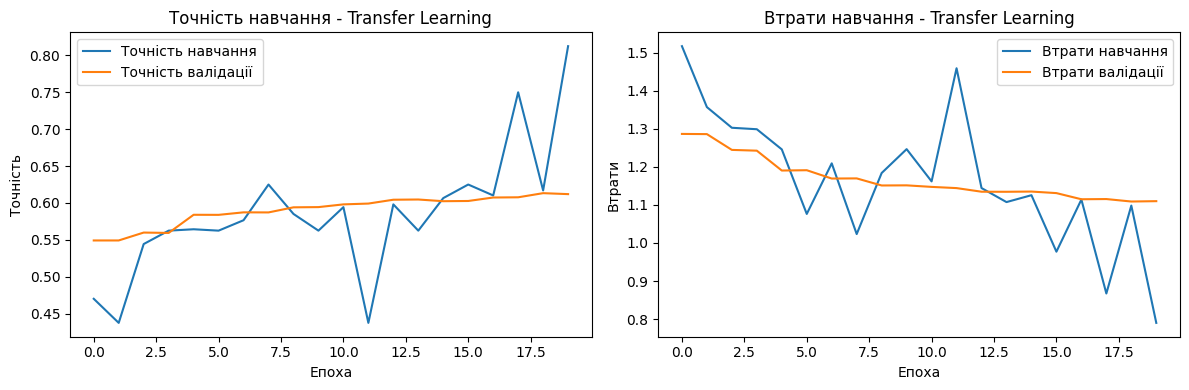

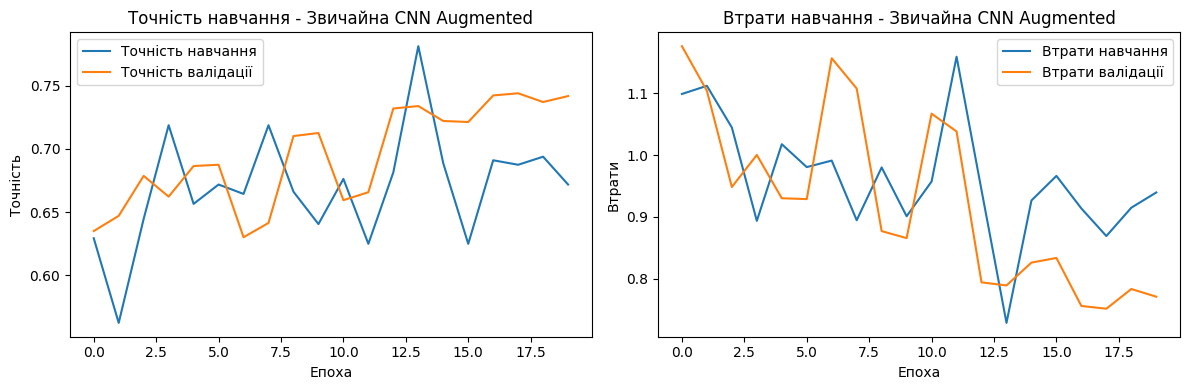

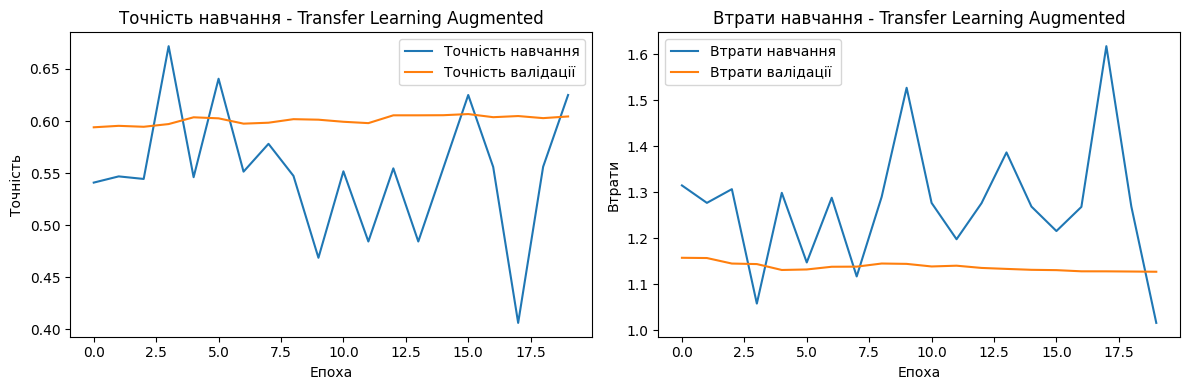

In [ ]:
# Графік навчання
def plot_training_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Точність навчання')
    plt.plot(history.history['val_accuracy'], label='Точність валідації')
    plt.title(f'Точність навчання - {title}')
    plt.xlabel('Епоха')
    plt.ylabel('Точність')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Втрати навчання')
    plt.plot(history.history['val_loss'], label='Втрати валідації')
    plt.title(f'Втрати навчання - {title}')
    plt.xlabel('Епоха')
    plt.ylabel('Втрати')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_training_history(cnn_history, 'Звичайна CNN')
plot_training_history(transfer_history, 'Transfer Learning')
plot_training_history(cnn_augmented_history, 'Звичайна CNN Augmented')
plot_training_history(transfer_augmented_history, 'Transfer Learning Augmented')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Enhanced CNN model:
Epoch 1/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 56s 56ms/step - accuracy: 0.2304 - loss: 2.4282 - val_accuracy: 0.4417 - val_loss: 1.5341
Epoch 2/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.5156 - loss: 1.4618 - val_accuracy: 0.4490 - val_loss: 1.5230
Epoch 3/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.4349 - loss: 1.5576 - val_accuracy: 0.5230 - val_loss: 1.3919
Epoch 4/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - accuracy: 0.4531 - loss: 1.4324 - val_accuracy: 0.5183 - val_loss: 1.4020
Epoch 5/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.5125 - loss: 1.3740 - val_accuracy: 0.5503 - val_loss: 1.3146
Epoch 6/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5156 - loss: 1.3506 - val_accuracy: 0.5462 - val_loss: 1.3395
Epoch 7/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.5657 - loss: 1.2432 - val_accuracy: 0.6024 - val_loss: 1.1406
Epoch 8/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy:

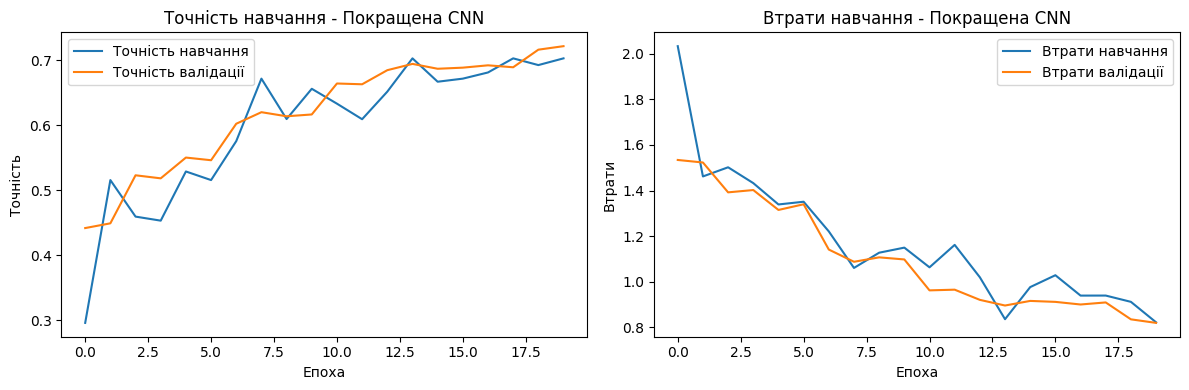

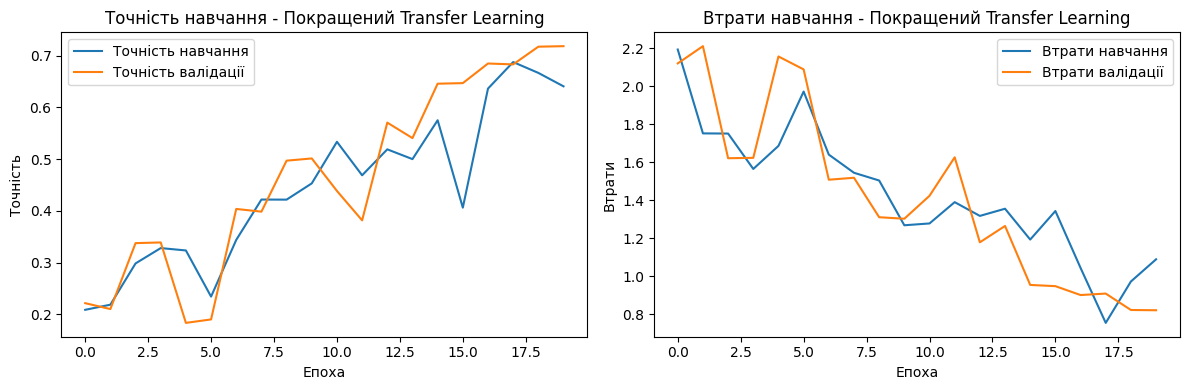

In [ ]:
def create_enhanced_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

def create_enhanced_transfer_learning_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

    # Заморожуємо всі шари спочатку
    base_model.trainable = True

    # Розморожуємо тільки останні 8 шарів
    for layer in base_model.layers[:-8]:
        layer.trainable = False

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])


    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

enhanced_cnn_model = create_enhanced_cnn_model()
enhanced_transfer_model = create_enhanced_transfer_learning_model()

print("Training Enhanced CNN model:")
enhanced_cnn_history = train_model(enhanced_cnn_model, x_train, y_train, x_test, y_test)

print("\nTraining Enhanced Transfer Learning model:")
enhanced_transfer_history = train_model(enhanced_transfer_model, x_train, y_train, x_test, y_test)

print("\nРезультати покращеної CNN:")
evaluate_model(enhanced_cnn_model, x_test, y_test)

print("\nРезультати покращеної моделі з Transfer Learning:")
evaluate_model(enhanced_transfer_model, x_test, y_test)

plot_training_history(enhanced_cnn_history, 'Покращена CNN')
plot_training_history(enhanced_transfer_history, 'Покращений Transfer Learning')